In [2]:
from typing_extensions import dataclass_transform
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('GOOG.csv', date_parser = True)
data.tail()



<ipython-input-2-bbe3fd4950bf>:7: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('GOOG.csv', date_parser = True)


,Date,Open,High,Low,Close,Adj Close,Volume
4928,3/19/2024,148.979996,149.619995,147.009995,147.919998,147.919998,17748400
4929,3/20/2024,148.789993,149.759995,147.664993,149.679993,149.679993,17730000
4930,3/21/2024,150.320007,151.304993,148.009995,148.740005,148.740005,19843900
4931,3/22/2024,150.240005,152.559998,150.089996,151.770004,151.770004,19226300
4932,3/25/2024,150.949997,151.455994,148.800003,151.149994,151.149994,15099700


In [23]:
data_training = data[data['Date']<'2019-01-01'].copy()
data_training

data_test = data[data['Date']>='2019-01-01'].copy()
data_test

training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()


,Open,High,Low,Close,Volume
30,3.257789,3.343468,3.210466,3.302123,303934969
31,3.368624,3.408972,3.338237,3.363891,261693228
32,3.353929,3.450317,3.293655,3.446332,300887589
33,3.425909,3.448325,3.387304,3.414203,268900140
34,3.410218,3.483941,3.401002,3.458287,283643194


In [27]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.80667668e-01],
       [7.35213122e-04, 4.31354519e-04, 8.53459351e-04, 4.07607674e-04,
        1.54971563e-01],
       [6.37735278e-04, 7.03618084e-04, 5.55669361e-04, 9.51636691e-04,
        1.78813914e-01],
       ...,
       [9.03152389e-01, 9.03132305e-01, 9.03680161e-01, 9.02730653e-01,
        9.38501839e-03],
       [9.01096048e-01, 8.95164218e-01, 8.91256096e-01, 8.85111209e-01,
        1.44125243e-02],
       [8.96120996e-01, 8.99576264e-01, 8.97468179e-01, 9.00618923e-01,
        1.73666639e-02]])

In [24]:
data_training[0:10]

,Date,Open,High,Low,Close,Adj Close,Volume
30,10/1/2004,3.257789,3.343468,3.210466,3.302123,3.302123,303934969
31,10/4/2004,3.368624,3.408972,3.338237,3.363891,3.363891,261693228
32,10/5/2004,3.353929,3.450317,3.293655,3.446332,3.446332,300887589
33,10/6/2004,3.425909,3.448325,3.387304,3.414203,3.414203,268900140
34,10/7/2004,3.410218,3.483941,3.401002,3.458287,3.458287,283643194
35,10/8/2004,3.455050,3.478960,3.412708,3.430392,3.430392,222442656
36,10/11/2004,3.412210,3.458537,3.333754,3.368873,3.368873,210437827
37,10/12/2004,3.348449,3.427403,3.322546,3.422173,3.422173,234419380
38,10/13/2004,3.569620,3.575349,3.488923,3.509346,3.509346,397203256
39,10/14/2004,3.512086,3.546208,3.451065,3.536743,3.536743,209835578


In [29]:
X_train = []
y_train = []

training_data.shape[0]

for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    y_train.append(training_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape




((1998, 60, 5), (1998,))

In [30]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

regressior = Sequential()
regressior.add(LSTM(units = 50, activation='relu', return_sequences= True, input_shape = (X_train.shape[1], 5)))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 60, activation='relu', return_sequences= True))
regressior.add(Dropout(0.3))

regressior.add(LSTM(units = 80, activation='relu', return_sequences= True))
regressior.add(Dropout(0.4))

regressior.add(LSTM(units = 120, activation='relu'))
regressior.add(Dropout(0.5))

regressior.add(Dense(units = 1))

regressior.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            11200     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 60)            26640     
                                                                 
 dropout_5 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_6 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [31]:
regressior.compile(optimizer='adam', loss = 'mean_squared_error')
regressior.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
63/63 [==============================] - 17s 181ms/step - loss: 0.0209
Epoch 2/50
63/63 [==============================] - 12s 184ms/step - loss: 0.0065
Epoch 3/50
63/63 [==============================] - 11s 182ms/step - loss: 0.0056
Epoch 4/50
63/63 [==============================] - 12s 186ms/step - loss: 0.0055
Epoch 5/50
63/63 [==============================] - 11s 182ms/step - loss: 0.0056
Epoch 6/50
63/63 [==============================] - 11s 181ms/step - loss: 0.0056
Epoch 7/50
63/63 [==============================] - 11s 181ms/step - loss: 0.0040
Epoch 8/50
63/63 [==============================] - 11s 172ms/step - loss: 0.0044
Epoch 9/50
63/63 [==============================] - 11s 170ms/step - loss: 0.0046
Epoch 10/50
63/63 [==============================] - 11s 183ms/step - loss: 0.0041
Epoch 11/50
63/63 [==============================] - 12s 183ms/step - loss: 0.0034
Epoch 12/50
63/63 [==============================] - 12s 186ms/step - loss: 0.0039
Epoch 13/50
6

In [ ]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/19/2004,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,8/20/2004,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,8/23/2004,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,8/24/2004,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,8/25/2004,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [ ]:
data_training.tail(60)

,Date,Open,High,Low,Close,Adj Close,Volume
4856,12/4/2023,131.294006,131.449997,129.399994,130.630005,130.630005,24117100
4857,12/5/2023,130.369995,133.539993,129.729996,132.389999,132.389999,19235100
4858,12/6/2023,132.899994,133.309998,131.309998,131.429993,131.429993,16360600
4859,12/7/2023,136.600006,140.000000,136.229996,138.449997,138.449997,38419400
4860,12/8/2023,135.660004,137.990005,135.570007,136.639999,136.639999,22990900
4861,12/11/2023,133.820007,134.789993,132.889999,134.699997,134.699997,24502900
4862,12/12/2023,133.270004,134.539993,132.830002,133.639999,133.639999,26584000
4863,12/13/2023,134.544998,134.779999,132.949997,133.970001,133.970001,25414500
4864,12/14/2023,134.770004,135.035004,131.059998,133.199997,133.199997,29619100
4865,12/15/2023,132.919998,134.830002,132.630005,133.839996,133.839996,58569400


In [ ]:
past_60_days = data_training.tail(60)

df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()



<ipython-input-26-bdad478b9c93>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = past_60_days.append(data_test, ignore_index = True)


,Open,High,Low,Close,Volume
0,131.294006,131.449997,129.399994,130.630005,24117100
1,130.369995,133.539993,129.729996,132.389999,19235100
2,132.899994,133.309998,131.309998,131.429993,16360600
3,136.600006,140.000000,136.229996,138.449997,38419400
4,135.660004,137.990005,135.570007,136.639999,22990900


In [ ]:
inputs = scaler.transform(df)
inputs

array([[0.84931571, 0.84360238, 0.84289575, 0.84023802, 0.01045145],
       [0.84318637, 0.85736534, 0.84510003, 0.85185224, 0.00748167],
       [0.85996888, 0.85585079, 0.85565381, 0.84551715, 0.00573309],
       ...,
       [0.97552283, 0.97435076, 0.96720314, 0.9597461 , 0.00785201],
       [0.97499214, 0.98261518, 0.98109671, 0.97974109, 0.00747632],
       [0.9797018 , 0.97534513, 0.97248008, 0.97564964, 0.00496607]])

In [ ]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape



((2875, 60, 5), (2875,))

In [ ]:
y_pred = regressior.predict(X_test)

scaler.scale_


90/90 [==============================] - 5s 56ms/step


array([6.63340210e-03, 6.58516303e-03, 6.67960140e-03, 6.59901040e-03,
       6.08310759e-10])

In [ ]:
scale = 1/8.18605127e-04
scale

1221.5901990069017

In [ ]:
y_pred = y_pred*scale
y_test = y_test*scale

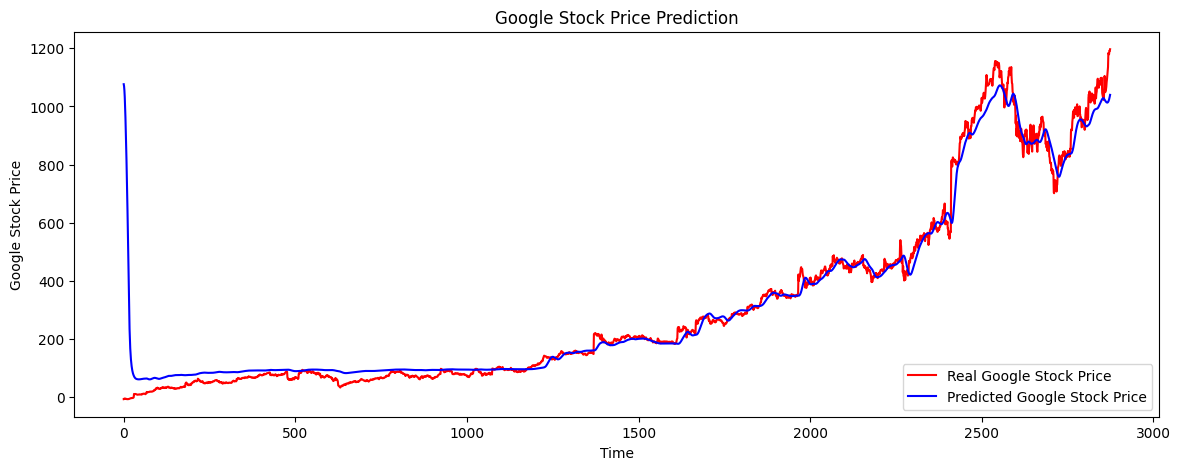

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()